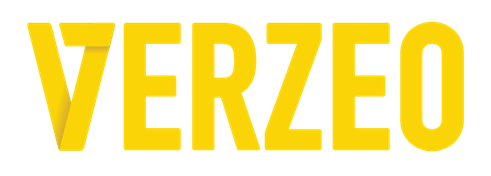
**Machine Learning with Python MAJOR PROJECT**


---


BY
                **S ASIF ALI**

**INTRODUCTION**


>  Building the Banking Behavioural Scorecard Machine Learning model
with "PYTHON".It is used to predict whether the customer is defaulter on his EMI payment or not.






---




# Machine Learning Model

In [ ]:
#Importing Libraries which are required for my model
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats
from google.colab import drive
from sklearn.model_selection import train_test_split

**Exploratory Data Analaysis**

**Reading the datasets**


*   The pandas libarary is used to read csv files.
*   There are 2 datasets named Train and Test csv files which I am using in my model.
*   Below is the code for it.






In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/Data set/Train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Data set/Test.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (746,835) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Shape of data**

*   From below code we can see that how many rows and cloumns present in our data set.
*   "Shape" fuction is used to see that.



In [ ]:
data_train.shape,data_test.shape

((17521, 2395), (20442, 2394))

**Data Type of features**

*  we can see the data types of each feature of our dataset.
*  For further processing the data we need to drop the features which contains "object" data type because those features are not required to predition.
*  "col1" in both train and test data sets has "object" datatype.

---













In [ ]:
print(data_train.dtypes)
print(data_test.dtypes)

Col1        object
Col2         int64
Col3       float64
Col4       float64
Col5       float64
            ...   
Col2393    float64
Col2394    float64
Col2395    float64
Col2396    float64
Col2397    float64
Length: 2395, dtype: object
Col1        object
Col3       float64
Col4       float64
Col5       float64
Col6       float64
            ...   
Col2393    float64
Col2394    float64
Col2395    float64
Col2396    float64
Col2397    float64
Length: 2394, dtype: object




**Displaying few rows and columns**




In [ ]:
data_train.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,...,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,...,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,...,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,...,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,...,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


In [ ]:
data_test.head()

,Col1,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGD58ZWD,8.167140e+04,8.614542e+04,7.532296e+04,7.532296e+04,1.125174e+05,1.002778e+05,2.038915e+04,3.053853e+04,8.395911e+04,...,0,0,0,0,44.0,44.0,23.0,41.0,41.0,36.0
1,RIH660YDS,-1.362824e+07,-4.493043e+06,-3.777257e+06,-4.493043e+06,-4.749764e+06,-4.749764e+06,1.147556e+07,1.147556e+07,1.272055e+07,...,1,1,2,2,1234.0,1234.0,680.0,154.0,153.0,86.0
2,RIH660Q96,1.302700e+06,1.341449e+06,1.240085e+06,1.341449e+06,1.477503e+06,1.477503e+06,3.904086e+05,3.904086e+05,4.979106e+05,...,0,0,0,0,33.0,24.0,19.0,3.0,1.0,1.0
3,RIYDO15W1,1.932258e+05,1.454433e+05,1.929148e+05,1.454433e+05,1.318250e+04,1.318250e+04,8.650108e+04,8.650108e+04,5.896693e+03,...,0,0,0,0,8.0,8.0,3.0,7.0,7.0,3.0
4,RIYBGC1ZD,3.913385e+05,1.987337e+05,1.703432e+05,1.987337e+05,3.046536e+05,3.046536e+05,2.528307e+05,2.528307e+05,3.034449e+05,...,0,0,0,0,7.0,7.0,7.0,6.0,6.0,5.0




*  As we can see that column "col1" has unique values in both datasets such that we can say feature is not required for model predition.
*     As already mentioned in the project the column "col2" is Target feature for analyzing further in model I am droping it for now.


---



*   Using drop function I have droped the features 'col1' in both datasets and 'col2' in train dataset.
*  Then Assigned Train dataset to variable "X".
* I have Stored "col2" column in "Y" variable for further use.
*  Test dataset to variable "Xtest".

In [ ]:
X = data_train.drop(['Col1','Col2'], axis=1)
y = data_train.Col2

XTest = data_test.drop(['Col1'], axis=1)

In [ ]:
y.value_counts(normalize=True) * 100

0    89.949204
1    10.050796
Name: Col2, dtype: float64

**Comparing both datasets**


*   Checking whether the datasets having same entries and datatypes




In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Columns: 2393 entries, Col3 to Col2397
dtypes: float64(844), int64(1547), object(2)
memory usage: 319.9+ MB


In [ ]:
XTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20442 entries, 0 to 20441
Columns: 2393 entries, Col3 to Col2397
dtypes: float64(837), int64(1545), object(11)
memory usage: 373.2+ MB




*   From above we can see that something is wrong
*   In  Train dataset there are only 2 object values where as Test dataset it contains 11 object values.
*Ideally we know that both Train amd Test datasets should contain features with same data types.



**Now let us see in what columns the objects are present**

In [ ]:
# Object values in "Train" dataset
for col in X.select_dtypes('object').columns:
    print(col)
    print(X[col].unique())
    print("--------------------------------------------------------------------\n")

Col747
[nan '-' '0' '1' 0.0 5.0 '3']
--------------------------------------------------------------------

Col836
[nan '-' '0' 0.0 '5']
--------------------------------------------------------------------



In [ ]:
# Object values in "Test" Dataset
for col in X.select_dtypes('object').columns:
    print(col)
    print(X[col].unique())
    print("--------------------------------------------------------------------\n")

Col702
[nan 0.0 '0' '-']
--------------------------------------------------------------------

Col733
[nan 0.349927106 0.23489684 0.2387925689999999 0.326225572
 -0.2099562639999999 0.0699854209999999 0.283473355 0.100574803
 -0.094491118 0.43723953 0.0 0.482371579 -0.223606798 -0.2309364019999999
 -0.287181807 0.365962527 0.188982237 -0.005459133 0.350883835
 -0.1223531269999999 0.203411286 -0.124833495 -1.11e-17 0.069161739
 0.2099562639999999 0.223606798 0.4902332889999999 0.3684670879999999 0.6
 -0.2 0.111762013 0.461541869 -5.55e-18 0.267600457 0.356890822 -0.6
 -3.97e-18 -0.120203624 0.2 0.447213596 0.338943084 -0.164954156
 0.399347441 0.039904182 -0.42405191 0.356429936 0.094491118 0.428811668
 -0.0699854209999999 0.456012469 -0.063718173 -0.188982237 -0.129791319
 -0.147929864 0.13703048 -0.216598788 0.3851774129999999 0.385473461
 0.401123362 0.4426266679999999 0.013413513 -0.582413089 0.154402328
 0.206839799 -0.221745896 -0.600004941 -0.565007326 -0.0003611359999999
 -0.689

**Cleaning The Data**


*  For a Machine learning model if the datasets consist object data type we should remove it.Because it leads to errors while prediction.
*   As well as if there are negative values they also leads to errors while prediction.


---
* So, I am converting the string Values into "Float".
* And negative values with "NAN".
* For Doing that I have Created user defined function and created list and stored the features which have object values.
*Then using the for loop changed them into required way.




In [ ]:
def convert_to_float(row):
    if row == '-':
        return np.nan
    else:
        return float(row)

In [ ]:
#Displaying the column which contain object values
columns_to_change = list(X.select_dtypes('object').columns) + list(XTest.select_dtypes('object').columns)
print(len(columns_to_change))
print(columns_to_change)

13
['Col747', 'Col836', 'Col702', 'Col733', 'Col742', 'Col754', 'Col763', 'Col791', 'Col813', 'Col822', 'Col831', 'Col843', 'Col852']


In [ ]:
for col in columns_to_change:
    X[col] = X[col].apply(convert_to_float)
    XTest[col] = XTest[col].apply(convert_to_float)





* Now we can see that there are no any object data type.






In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Columns: 2393 entries, Col3 to Col2397
dtypes: float64(846), int64(1547)
memory usage: 319.9 MB


In [ ]:
XTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20442 entries, 0 to 20441
Columns: 2393 entries, Col3 to Col2397
dtypes: float64(848), int64(1545)
memory usage: 373.2 MB


**Checking if there are any duplicate rows**

In [ ]:
duplicate_rows_in_train = X.duplicated()
duplicate_rows_in_test = XTest.duplicated()

print(f"Train data consists {sum(duplicate_rows_in_train)} duplicate rows")
print(f"Test data consists {sum(duplicate_rows_in_test)} duplicate rows")

Train data consists 1116 duplicate rows
Test data consists 1203 duplicate rows


In [ ]:
# Here y is nothing but "col2" which is target variable of our dataset
y[duplicate_rows_in_train]

1556     0
1557     0
3996     0
3997     0
4425     1
        ..
17465    0
17483    0
17498    0
17504    0
17505    0
Name: Col2, Length: 1116, dtype: int64

In [ ]:
# Here the code is for counting the Duplicate values in the target variable
y[duplicate_rows_in_train].value_counts(normalize=True)

0    0.884409
1    0.115591
Name: Col2, dtype: float64

In [ ]:
y[duplicate_rows_in_train].head(30)

1556     0
1557     0
3996     0
3997     0
4425     1
4881     1
5104     0
5438     0
5989     0
6525     0
6673     0
7994     0
8248     0
8585     0
9439     0
9915     0
10130    1
10164    0
10178    0
10188    0
10189    1
10217    0
10222    0
10223    1
10224    0
10225    0
10226    1
10227    0
10310    0
10320    0
Name: Col2, dtype: int64

In [ ]:
data_train.corr()

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
Col2,1.000000,-0.030748,-0.027851,-0.030471,-0.030489,-0.028520,-0.030561,-0.000675,0.009056,-0.005278,...,0.010743,0.005708,0.003586,-0.003835,0.033681,0.033394,0.023931,0.002156,0.000963,-0.000036
Col3,-0.030748,1.000000,0.982237,0.900193,0.988359,0.982670,0.982962,-0.464821,-0.701978,-0.264779,...,-0.002670,0.002034,-0.001152,0.001850,-0.069133,-0.072543,-0.103986,-0.026519,-0.028209,-0.040184
Col4,-0.027851,0.982237,1.000000,0.921953,0.993567,0.994026,0.992919,-0.447950,-0.710775,-0.250169,...,0.000342,0.003531,0.001812,0.002934,-0.067155,-0.069008,-0.102781,-0.038453,-0.039823,-0.053991
Col5,-0.030471,0.900193,0.921953,1.000000,0.919360,0.906248,0.915298,-0.348940,-0.610845,-0.153207,...,-0.006211,-0.001801,-0.004862,-0.002794,-0.041949,-0.043769,-0.076711,-0.011324,-0.012808,-0.024583
Col6,-0.030489,0.988359,0.993567,0.919360,1.000000,0.987704,0.992882,-0.410729,-0.678968,-0.218232,...,-0.002630,0.001928,-0.001232,0.001879,-0.068222,-0.071328,-0.106441,-0.036374,-0.038529,-0.053627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Col2393,0.033394,-0.072543,-0.069008,-0.043769,-0.071328,-0.055124,-0.057961,0.095663,0.094135,0.070428,...,0.430621,0.372948,0.433682,0.378077,0.998087,1.000000,0.922617,0.562599,0.560360,0.486062
Col2394,0.023931,-0.103986,-0.102781,-0.076711,-0.106441,-0.081947,-0.086659,0.135436,0.136097,0.096402,...,0.367440,0.327546,0.366881,0.326182,0.917061,0.922617,1.000000,0.558842,0.561863,0.559381
Col2395,0.002156,-0.026519,-0.038453,-0.011324,-0.036374,0.001636,-0.002905,0.171525,0.126946,0.095300,...,0.165266,0.149724,0.169234,0.157177,0.563441,0.562599,0.558842,1.000000,0.998623,0.957110
Col2396,0.000963,-0.028209,-0.039823,-0.012808,-0.038529,0.000510,-0.004430,0.170037,0.126672,0.093626,...,0.164821,0.148556,0.168591,0.155680,0.559030,0.560360,0.561863,0.998623,1.000000,0.961784


In [ ]:
'''
Now I am Adding one more column into both the sets named "duplicate_row".
With the help of Boolean Datatype,Like if the Row in the dataset is duplicate then it Will be entered as TRUE
Where as if the row is not duplicate then it will be entered as FALSE

'''
X['duplicate_row'] = False #intially it is entered as False in Train Dataset
XTest['duplicate_row'] = False #intially it is entered as False Test Dataset

X.loc[duplicate_rows_in_train, 'duplicate_row'] = True #If it locates the row is duplicate then it will be entered as True in Train dataset
XTest.loc[duplicate_rows_in_test, 'duplicate_row'] = True #If it locates the row is duplicate then it will be entered as True in Test dataset

In [ ]:
X.head()

,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,...,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397,duplicate_row
0,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,9.114586e+03,3.043078e+04,...,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0,False
1,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,2.013518e+05,1.859404e+05,...,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0,False
2,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,9.368338e+06,1.113330e+07,...,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0,False
3,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,4.304848e+05,4.065539e+05,...,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0,False
4,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,3.473444e+06,3.262168e+06,...,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0,False


In [ ]:
XTest.head()

,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,...,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397,duplicate_row
0,8.167140e+04,8.614542e+04,7.532296e+04,7.532296e+04,1.125174e+05,1.002778e+05,2.038915e+04,3.053853e+04,8.395911e+04,8.138800e+04,...,0,0,0,44.0,44.0,23.0,41.0,41.0,36.0,False
1,-1.362824e+07,-4.493043e+06,-3.777257e+06,-4.493043e+06,-4.749764e+06,-4.749764e+06,1.147556e+07,1.147556e+07,1.272055e+07,1.272055e+07,...,1,2,2,1234.0,1234.0,680.0,154.0,153.0,86.0,False
2,1.302700e+06,1.341449e+06,1.240085e+06,1.341449e+06,1.477503e+06,1.477503e+06,3.904086e+05,3.904086e+05,4.979106e+05,4.979106e+05,...,0,0,0,33.0,24.0,19.0,3.0,1.0,1.0,False
3,1.932258e+05,1.454433e+05,1.929148e+05,1.454433e+05,1.318250e+04,1.318250e+04,8.650108e+04,8.650108e+04,5.896693e+03,5.896693e+03,...,0,0,0,8.0,8.0,3.0,7.0,7.0,3.0,False
4,3.913385e+05,1.987337e+05,1.703432e+05,1.987337e+05,3.046536e+05,3.046536e+05,2.528307e+05,2.528307e+05,3.034449e+05,3.034449e+05,...,0,0,0,7.0,7.0,7.0,6.0,6.0,5.0,False


In [ ]:
features = X.columns
duplicate_columns = set()
for i in range(len(features)):
    for j in range(i+1, len(features)):
        if np.all(X[features[i]] == X[features[j]]):
            print(features[i], features[j])
            duplicate_columns.add(features[j])

Col136 Col137
Col942 Col1344
Col943 Col1345
Col962 Col1352
Col963 Col1353
Col974 Col1066
Col974 Col1158
Col974 Col1250
Col974 Col1704
Col974 Col1796
Col974 Col1888
Col974 Col1980
Col975 Col1705
Col986 Col1302
Col987 Col1303
Col990 Col1082
Col991 Col1083
Col992 Col1084
Col992 Col1176
Col993 Col1085
Col1006 Col1310
Col1007 Col1311
Col1018 Col1110
Col1018 Col1202
Col1018 Col1748
Col1018 Col1840
Col1018 Col1932
Col1019 Col1111
Col1019 Col1203
Col1019 Col1251
Col1019 Col1295
Col1019 Col1749
Col1019 Col1841
Col1019 Col1933
Col1019 Col1981
Col1019 Col2025
Col1034 Col1434
Col1035 Col1435
Col1054 Col1442
Col1055 Col1443
Col1066 Col1158
Col1066 Col1250
Col1066 Col1704
Col1066 Col1796
Col1066 Col1888
Col1066 Col1980
Col1067 Col1159
Col1067 Col1797
Col1067 Col1889
Col1078 Col1392
Col1079 Col1393
Col1084 Col1176
Col1098 Col1400
Col1099 Col1401
Col1110 Col1202
Col1110 Col1748
Col1110 Col1840
Col1110 Col1932
Col1111 Col1203
Col1111 Col1251
Col1111 Col1295
Col1111 Col1749
Col1111 Col1841
Col1111 Col19

In [ ]:
print("Number of duplicate columns:",len(duplicate_columns))

Number of duplicate columns: 101


In [ ]:
selected_features = [_ for _ in X.columns if _ not in duplicate_columns]
print("Selected_Features :",len(selected_features))

Selected_Features : 2293


In [ ]:
RANDOM_SEED = 1

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score
import xgboost as xgb
import lightgbm as lgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import StratifiedKFold

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X[selected_features], y, random_state=RANDOM_SEED,test_size=0.2)

# Evaluation matrix

**F1_score matrix Evaluation**


In [ ]:
def score(params):
    try:

        print("Training with params: ",params)
        num_round = int(params['n_estimators'])
        del params['n_estimators']
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dvalid = xgb.DMatrix(X_valid, label=y_valid)
        watchlist = [(dtrain, 'train'),(dvalid, 'eval')]
        gbm_model = xgb.train(params, dtrain, num_round,evals=watchlist,verbose_eval=False)
        predictions = gbm_model.predict(dvalid,ntree_limit=gbm_model.best_iteration + 1)
        predictions = (predictions >= 0.5).astype('int')
        score = 100*f1_score(y_valid, predictions, average='weighted')
        print("\tScore {0}\n\n".format(score))

        loss = 1 - score
        return {'loss': loss, 'status': STATUS_OK}

    except AssertionError as obj:
        loss = 1 - 0
        return {'loss': loss, 'status': STATUS_OK}

    except Exception as obj:
        loss = 1 - 0
        return {'loss': loss, 'status': STATUS_OK}

In [ ]:
def optimize(trials,max_evals,random_state=RANDOM_SEED):
    space = {
        'n_estimators': hp.quniform('n_estimators', 100, 300, 1),
        'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        'max_depth':  hp.choice('max_depth', np.arange(1, 7, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma': hp.quniform('gamma', 0, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        'scale_pos_weight': hp.quniform('scale_pos_weight', 1,4, 0.05),
        "reg_alpha": hp.quniform('reg_alpha', 0, 1, 0.05),
        "reg_lambda": hp.quniform('reg_lambda', 1, 5, 0.05),
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'nthread': 4,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
        'seed': random_state
    }
    best = fmin(score,
                space,
                algo=tpe.suggest,
                trials=trials,
                max_evals=max_evals)
    return best

In [ ]:
trials = Trials()
MAX_EVALS = 25

best_hyperparams = optimize(trials, MAX_EVALS)
print("The best hyperparameters are: ", "\n")
print(best_hyperparams)

Training with params: 
{'booster': 'gbtree', 'colsample_bytree': 0.55, 'eta': 0.1, 'eval_metric': 'logloss', 'gamma': 0.15000000000000002, 'max_depth': 6, 'min_child_weight': 2.0, 'n_estimators': 123.0, 'nthread': 4, 'objective': 'binary:logistic', 'reg_alpha': 0.30000000000000004, 'reg_lambda': 3.45, 'scale_pos_weight': 3.9000000000000004, 'seed': 1, 'silent': 1, 'subsample': 1.0, 'tree_method': 'exact'}
	Score 86.40285479357551


Training with params: 
{'booster': 'gbtree', 'colsample_bytree': 0.6000000000000001, 'eta': 0.17500000000000002, 'eval_metric': 'logloss', 'gamma': 0.9, 'max_depth': 1, 'min_child_weight': 5.0, 'n_estimators': 143.0, 'nthread': 4, 'objective': 'binary:logistic', 'reg_alpha': 0.9, 'reg_lambda': 3.0, 'scale_pos_weight': 2.5, 'seed': 1, 'silent': 1, 'subsample': 0.65, 'tree_method': 'exact'}
	Score 87.23645841077888


Training with params: 
{'booster': 'gbtree', 'colsample_bytree': 0.75, 'eta': 0.25, 'eval_metric': 'logloss', 'gamma': 0.75, 'max_depth': 1, 'min

In [ ]:
best_hyperparams

{'colsample_bytree': 0.7000000000000001,
 'eta': 0.125,
 'gamma': 1.0,
 'max_depth': 0,
 'min_child_weight': 6.0,
 'n_estimators': 157.0,
 'reg_alpha': 0.15000000000000002,
 'reg_lambda': 3.5,
 'scale_pos_weight': 2.8000000000000003,
 'subsample': 0.5}

In [ ]:
param = best_hyperparams
num_round = int(param['n_estimators'])
del param['n_estimators']

In [ ]:
num_splits = 5
skf = StratifiedKFold(n_splits= num_splits, random_state= RANDOM_SEED, shuffle=True)

In [ ]:
dxtest = xgb.DMatrix(XTest[selected_features])

In [ ]:
y_test_pred = np.zeros((XTest[selected_features].shape[0], 1))
print(y_test_pred.shape)
y_valid_scores = []

X_TRAIN = X[selected_features].copy()
Y_TRAIN = y.copy()
X_TRAIN = X_TRAIN.reindex()
Y_TRAIN = Y_TRAIN.reindex()

fold_cnt = 1
for train_index, test_index in skf.split(X_TRAIN,Y_TRAIN):
    print("FOLD .... ",fold_cnt)
    fold_cnt += 1

    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_valid = X_TRAIN.iloc[train_index], X_TRAIN.iloc[test_index]
    y_train, y_valid = Y_TRAIN.iloc[train_index], Y_TRAIN.iloc[test_index]

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)

    evallist = [(dtrain, 'train'), (dvalid, 'eval')]

    # Training xgb model
    bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval=50)

    # Predict Validation
    y_pred_valid = bst.predict(dvalid, ntree_limit=bst.best_iteration + 1)
    y_valid_scores.append(f1_score(y_valid, (y_pred_valid >= 0.5).astype(int), average='weighted'))

    # Predict Test
    y_pred = bst.predict(dxtest, ntree_limit=bst.best_iteration+1)

    y_test_pred += y_pred.reshape(-1,1)

y_test_pred /= num_splits

(20442, 1)
FOLD ....  1
TRAIN: [    0     1     2 ... 17518 17519 17520] TEST: [   10    12    19 ... 17508 17510 17511]
[0]	train-rmse:0.474681	eval-rmse:0.474698
[50]	train-rmse:0.330925	eval-rmse:0.331133
[100]	train-rmse:0.329779	eval-rmse:0.329989
[150]	train-rmse:0.330285	eval-rmse:0.330486
[156]	train-rmse:0.330837	eval-rmse:0.331033
FOLD ....  2
TRAIN: [    1     4     7 ... 17518 17519 17520] TEST: [    0     2     3 ... 17503 17513 17514]
[0]	train-rmse:0.474029	eval-rmse:0.474024
[50]	train-rmse:0.330941	eval-rmse:0.330891
[100]	train-rmse:0.332066	eval-rmse:0.332014
[150]	train-rmse:0.330841	eval-rmse:0.330784
[156]	train-rmse:0.330062	eval-rmse:0.33001
FOLD ....  3
TRAIN: [    0     1     2 ... 17515 17516 17519] TEST: [   20    25    26 ... 17517 17518 17520]
[0]	train-rmse:0.474512	eval-rmse:0.474516
[50]	train-rmse:0.331402	eval-rmse:0.331352
[100]	train-rmse:0.330894	eval-rmse:0.330851
[150]	train-rmse:0.331182	eval-rmse:0.33113
[156]	train-rmse:0.330921	eval-rmse:0.33

In [ ]:
y_valid_scores

[0.8516003554654963,
 0.851971373375483,
 0.851971373375483,
 0.851971373375483,
 0.851971373375483]

In [ ]:
print("Average validation_score: ",np.mean(y_valid_scores))

Average validation_score:  0.8518971697934857


In [ ]:
output = data_test[['Col1']].copy()
output['Col2'] = (y_test_pred >= 0.5).astype(int)

In [ ]:
output.head()

,Col1,Col2
0,RIGD58ZWD,0
1,RIH660YDS,0
2,RIH660Q96,0
3,RIYDO15W1,0
4,RIYBGC1ZD,0


In [ ]:
output['Col2'].value_counts()/output.shape[0] * 100

0    100.0
Name: Col2, dtype: float64

In [ ]:
output.to_csv("./predict_hdfc_xgb_oof.csv", index=False)